In [5]:
import pandas as pd
import numpy as np
from utils.data_process import input_process, res_process
from utils.search import return_res
from utils.plot import plotly_plot
from utils.algo.calculation import *
from datetime import date
from os import walk
import re
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

In [7]:
# 讀入資料
Ticker = '2317TW'
start_date = "2014-12-05"
end_date = "2015-01-12"
df = pd.read_csv(r"./data/{}.csv".format(Ticker))
s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)

In [10]:
# 資料作圖
y = input_process.batch_scalar.min_max_scalar(np.array(df['Close'][s:e]))
x = np.array([i for i in range(len(y))])
plt.plot(x,y)

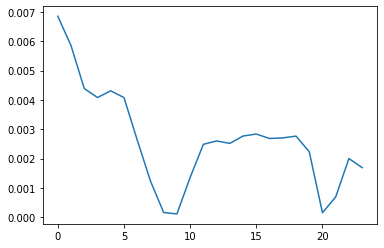

In [14]:
# fit多項式
p = np.polynomial.legendre.Legendre(poly2on(arr2poly_coef(y)))
y_pred = np.array([p(i) for i in x]) # 帶入轉換後多項式
plt.plot(x, y_pred) # 作圖檢視結果

In [15]:
# 執行搜尋
# search and return res
search_res = return_res.get_sim_res(df, s, e, 'poly_d') # a:b
    

# get res start and end
s_res, e_res = res_process.range_2_num(search_res)

100%|██████████| 3552/3552 [00:10<00:00, 341.55it/s]


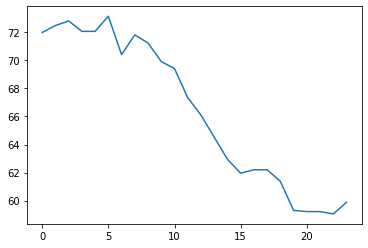

In [16]:
plt.plot(x,df['Close'][s_res:e_res])

In [74]:
def update_graph_shape_res(Ticker, start_date, end_date, step=10):

    # read data
    df = pd.read_csv(r"./data/{}.csv".format(Ticker))

    # transform date to index
    s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)

    # search and return res
    search_res = return_res.get_sim_res(df, s, e, 'polycos_d') # a:b
    

    # get res start and end
    s_res, e_res = res_process.range_2_num(search_res)

    return(
        plotly_plot.plot(df, s = s_res, e = e_res, step = step)
    )

In [76]:
update_graph_shape_res(Ticker=Ticker, start_date = start_date, end_date= end_date)

100%|██████████| 3562/3562 [00:18<00:00, 189.39it/s]


In [38]:
input_process.IndexDateMap(df, 104)

'2008-06-09'